## Phương pháp lai hóa: Thêm đặc trưng bằng đệ quy

Phương pháp này gồm các bước sau:

1) Xếp hạng các đặc trưng theo mức độ quan trọng của chúng từ thuật toán học máy: có thể là mức độ quan trọng của cây hoặc các hệ số thu được từ mô hình tuyến tính.

2) Xây dựng mô hình học máy chỉ với 1 đặc trưng, đặc trưng quan trọng nhất và tính toán phép đo chất lượng.

3) Thêm một đặc trưng - đặc trưng quan trọng nhất và xây dựng thuật toán học máy sử dụng đặc trưng đã thêm và bất kỳ đặc trưng nào từ các vòng trước đó.

4) Tính toán phép đo chất lượng đã chọn chọn: roc-auc, mse, rmse, accuracy,...

5) Nếu phép đo tăng nhiều hơn ngưỡng được thiết lập tùy ý thì đặc trưng đó quan trọng và cần được giữ lại; nếu không, chúng ta có thể loại bỏ đặc trưng đó.

6) Lặp lại các bước 2-5 cho đến khi tất cả các đặc trưng đã được đánh giá.


Phương pháp này được gọi là phương pháp lai hóa vì:

- nó lấy mức độ quan trọng từ thuật toán học máy như các phương pháp nhúng
- nó xây dựng một số mô hình học máy như các phương pháp gói.

Phương pháp này nhanh hơn các phương pháp gói và thường tốt hơn các phương pháp nhúng. Trên thực tế, nó hoạt động cực kỳ hiệu quả.

Cần lưu ý là mức giảm chất lượng tối thiểu để quyết định xem có nên giữ lại một đặc trưng hay không được thiết lập tùy ý. Mức giảm càng nhỏ thì càng có nhiều đặc trưng được chọn và ngược lại.

Chúng ta sẽ trình bày cách lựa chọn đặc trưng bằng phương pháp lai hóa trong bài toán hồi quy và phân loại.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score

## Hồi quy

In [2]:
# load tập dữ liệu
data = pd.read_csv('lab6-13_dataset/house-price/houseprice.csv')
data.shape

(1460, 81)

In [3]:
# Trên thực tế, nên thực hiện lựa chọn đặc trưng sau khi tiền xử lý dữ liệu,
# tất cả các biến hạng mục được mà hóa thành số,
# và rồi chúng ta có thể đánh giá tính tất định của các mục tiêu

# để đơn giản, chúng ta sẽ chỉ sử dụng biến dạng số
# lựa chọn các cột số:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [4]:
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [5]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Xếp hạng các đặc trưng theo mức độ quan trọng

In [6]:
# bước đầu tiên của quy trình này gồm xây dựng
# một thuật toán học máy với tất cả các đặc trưng
# rồi xác định mức độ quan trọng của các đặc trưng theo
# thuật toán

# xây dựng mô hình đầu tiên với tất cả các đặc trưng
model_full = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

model_full.fit(X_train, y_train)

# tính r2 trong tập kiểm tra
y_pred_test = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_test)

print('Test full dataset R2 = %f' % (r2_full))

Test full dataset R2 = 0.713130


<Axes: >

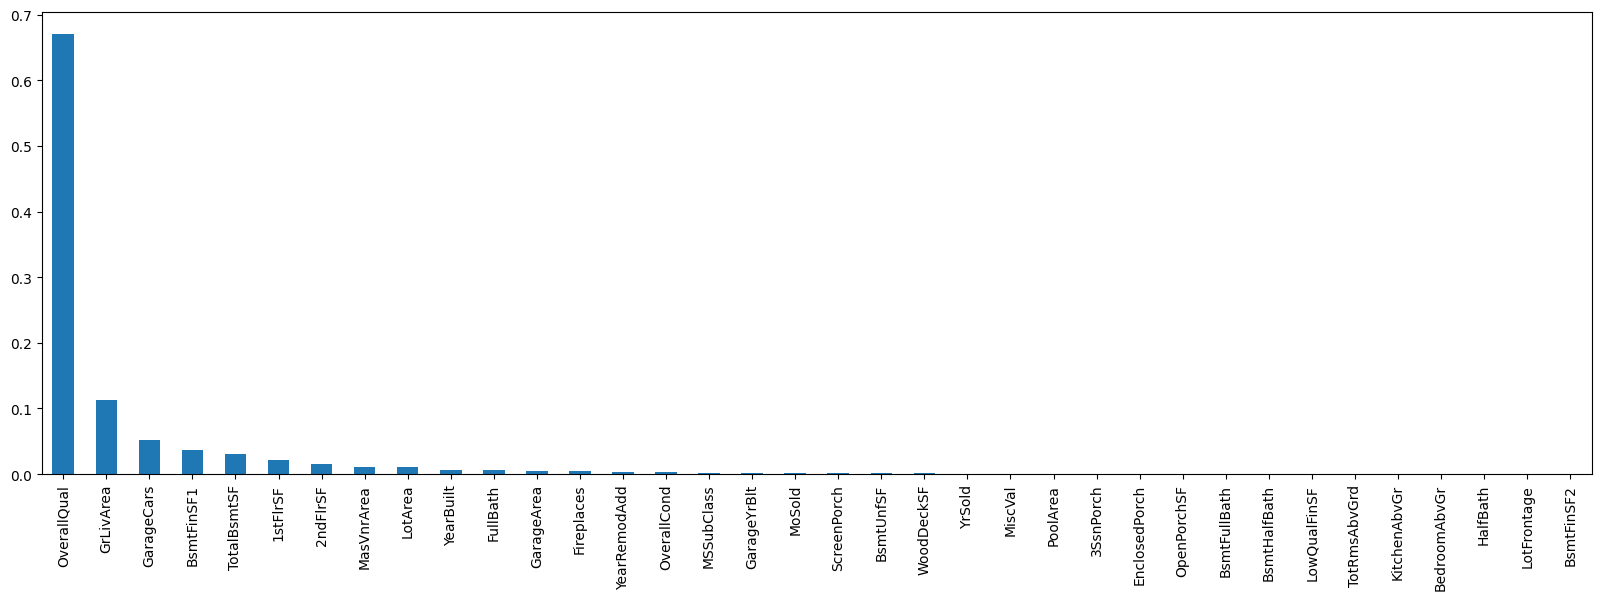

In [7]:
# bước thứ hai là lấy mức độ quan trọng của
# từng đặc trưng và xếp hạng từ quan trọng nhất đến 
# ít quan trọng nhất

# lấy tên đặc trưng và mức độ quan trọng
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns

# sắp xếp đặc trưng theo mức độ quan trọng
features.sort_values(ascending=False, inplace=True)

# vẽ biểu đồ
features.plot.bar(figsize=(20,6))

In [8]:
# tạo một list với các đặc trưng đã sắp xếp
features = list(features.index)
features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'MasVnrArea',
 'LotArea',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'Fireplaces',
 'YearRemodAdd',
 'OverallCond',
 'MSSubClass',
 'GarageYrBlt',
 'MoSold',
 'ScreenPorch',
 'BsmtUnfSF',
 'WoodDeckSF',
 'YrSold',
 'MiscVal',
 'PoolArea',
 '3SsnPorch',
 'EnclosedPorch',
 'OpenPorchSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'LowQualFinSF',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'BedroomAbvGr',
 'HalfBath',
 'LotFrontage',
 'BsmtFinSF2']

### Xây dựng mô hình học máy với 1 đặc trưng

In [9]:
# tiếp theo, chúng ta cần tạo thuật toán
# học máy chỉ sử dụng đặc trưng quan trọng nhất

# xây dựng mô hình ban đầu với 1 đặc trưng
model_one_feature = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# huấn luyện chỉ sử dụng đặc trưng quan trọng nhất 
model_one_feature.fit(X_train[features[0]].to_frame(), y_train)

# tính r2 trong tập kiểm tra
y_pred_test = model_one_feature.predict(X_test[features[0]].to_frame())
r2_first = r2_score(y_test, y_pred_test)
print('Test one feature R2=%f' % (r2_first))

Test one feature R2=0.631051


### Lựa chọn đặc trưng

In [10]:
# bước cuối cùng là thêm từng đặc trưng
# từ quan trọng nhất tới ít quan trọng nhất,
# xây dựng mô hình học máy và đánh giá chất lượng.

# khi đã tạo mô hình, chúng ta tính r2 mới 
# nếu r2 mới lớn hơn r2 ban đầu
# (với tất cả các đặc trưng) đặc trưng được thêm đó
# nếu quan trọng thì giữ lại
# nếu không thì loại bỏ đặc trưng
 
# thêm đặc trưng bằng đệ quy:

# trước tiên thiết lập mức tăng tùy ý trong r2
# nếu mức tăng cao hơn ngưỡng này,
# thì giữ đặc trưng lại
tol = 0.001

print('doing recursive feature addition')

# khởi tạo một list để thu thập
# các đặc trưng sẽ giữ lại
features_to_keep = [features[0]]

# thiết lập bộ đếm để biết vòng lặp sẽ đi bao xa
count = 1

# lặp qua tất cả các đặc trưng, theo thứ tự mức độ quan trọng:
# các đặc trưng trong list đã được sắp xếp
# theo mức độ quan trọng
for feature in features[1:]:
    print()
    print('testing feature: ', feature, count, ' out of ', len(features))
    count = count + 1

    # khởi tạo mô hình
    model_int = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

    # khớp mô hình với các đặc trưng đã chọn
    # và đặc trưng được đánh giá
    model_int.fit(X_train[features_to_keep + [feature] ], y_train)

    # đưa ra dự đoán trên tập kiểm tra
    y_pred_test = model_int.predict(X_test[features_to_keep + [feature] ])

    # tính r2 mới
    r2_int = r2_score(y_test, y_pred_test)
    print('New Test R2={}'.format((r2_int)))

    # in ra roc-auc ban đầu với tất cả các đặc trưng
    print('Previous round R2={}'.format((r2_first)))

    # xác định mức giảm trong roc-auc
    diff_r2 = r2_int - r2_first

    # so sánh mức tăng trong r2 với dung sai
    # chúng ta đã thiết lập trước đó
    if diff_r2 >= tol:
        print('Increase in r2 = {}'.format(diff_r2))
        print('keep: ', feature)
        print
        # nếu mức tăng trong r2 lớn hơn ngưỡng 
        # giữ đặc trưng và điều chỉnh lại r2 theo giá trị mới
        # dựa trên đặc trưng đã thêm
        r2_first = r2_int
        
        # thêm đặc trưng cần giữ vào list
        features_to_keep.append(feature)
    else:
        # bỏ qua đặc trưng
        print('Increase in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print


# vòng lặp đã hoàn thành, chúng ta đánh giá mọi đặc trưng
print('DONE!!')
print('total features to keep: ', len(features_to_keep))

doing recursive feature addition

testing feature:  GrLivArea 1  out of  36
New Test R2=0.7059734876125235
Previous round R2=0.6310512609331753
Increase in r2 = 0.07492222667934822
keep:  GrLivArea

testing feature:  GarageCars 2  out of  36
New Test R2=0.7163472150540834
Previous round R2=0.7059734876125235
Increase in r2 = 0.010373727441559843
keep:  GarageCars

testing feature:  BsmtFinSF1 3  out of  36
New Test R2=0.7123499142207127
Previous round R2=0.7163472150540834
Increase in r2 = -0.003997300833370687
remove:  BsmtFinSF1

testing feature:  TotalBsmtSF 4  out of  36
New Test R2=0.7340937364428985
Previous round R2=0.7163472150540834
Increase in r2 = 0.017746521388815162
keep:  TotalBsmtSF

testing feature:  1stFlrSF 5  out of  36
New Test R2=0.7373851754622972
Previous round R2=0.7340937364428985
Increase in r2 = 0.0032914390193986565
keep:  1stFlrSF

testing feature:  2ndFlrSF 6  out of  36
New Test R2=0.7453233235301489
Previous round R2=0.7373851754622972
Increase in r2 = 0

In [11]:
# cuối cùng, kiểm tra chất lượng của mô hình
# xây dựng trên các đặc trưng được chọn

# xây dựng mô hình ban đầu
model_final = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# khớp mô hình với các đặc trưng đã chọn
model_final.fit(X_train[features_to_keep], y_train)

# đưa ra dự đoán
y_pred_test = model_final.predict(X_test[features_to_keep])

# tính roc-auc
r2_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_final))

Test selected features r2 = 0.745323


Mô hình đã xây có 12 đặc trưng thể hiện chất lượng tốt hơn! (cần kéo xuống để tìm giá trị này, chúng ta đã tính trong một số cell trước)

Hãy thử các giá trị khác nhau để kiểm tra độ nhạy của thuật toán này.